<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Geophysikalisches Praktikum: Digital elevation model

## DEM model from LIDAR data
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*



In this notebook, we will read and plot a **digital elevation model** (DEM) derived from
Lidar data from [Berlin](https://fbinter.stadt-berlin.de/fb/index.jsp?loginkey=zoomStart&mapId=k_dgm1@senstadt&bbox=378400,5816319,382550,5819191).
<img src="images/Campus_3Dtopo.png" style="height:5cm">

----
## Reading and writing files

Our first script will be used to **read** a dataset of digital elevations. The dataset
are Lidar-derived digital elevation data from our FU GeoCampus, given in the UTM
coordinate system (Zome UTM 33T).

The first lines (starting with an exclamation mark) are **meta-data** of the dataset,
describing its content, technial details such as the source, the coordinate system,
and the content of the different columns:

Then, the data follow in simple ascii notation as three columns, the two coordinates (easting and northing) and the elevation value. The different entries are separated by blanks.

We will read this data file with the following script below. Here, we first load the numpy package and redefine its name to a shorter abbreviation, np. We then define the file Campus.xyz, our dataset, as string infile1.

The file is loaded with the `loadtxt` module of `numpy`, with arguments fname for the file, dtype for the data type (a float in our case), and skiprows=6 to tell the module to read over our first 6 lines of meta-data. Them, a couple of lines are written to the screen to check, what was read in. Try `print (np.loadtxt.__doc__)` to figure out all possible arguments, or use the numpy-user guide!

Before we initiate the python-code, we need to tell the jupyter notebook, that figures created with matplotlib should be printed in this notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.interpolate

## Load DEM data
Now we define the script to read the dataset:

In [2]:
"""
=====================================
Example to learn reading ascii data
and write formatted ascii output
(c) Georg Kaufmann 2017
=====================================
"""
#-----------------------------------------------------------------------
# read data into field
#-----------------------------------------------------------------------
inpath='data/'
infile1='Campus.xyz'
topo=np.loadtxt(fname=inpath+infile1, dtype='float',skiprows=6)
print ('=============================')
print ('%s %s' % ('Reading file: ',infile1))
print ('%s data type: %s\n%s data dimensions: %s' % \
      ('topo: ',type(topo),'topo: ',topo.shape))
#-----------------------------------------------------------------------
# calculate statistical properties
#-----------------------------------------------------------------------
east_min = np.min(topo[:,0])
east_max = np.max(topo[:,0])
north_min = np.min(topo[:,1])
north_max = np.max(topo[:,1])
elev_min = np.min(topo[:,2])
elev_max = np.max(topo[:,2])
print ( "%s%8.0f %8.0f" % ('easting min/max:   ',east_min,east_max))
print ( "%s%8.0f %8.0f" % ('northing min/max:  ',north_min,north_max))
print ( "%s%8.2f %8.2f" % ('elevation min/max: ',elev_min,elev_max))

Reading file:  Campus.xyz
topo:  data type: <class 'numpy.ndarray'>
topo:  data dimensions: (160801, 3)
easting min/max:     388200   388600
northing min/max:   5809500  5809900
elevation min/max:    40.43    46.28


## Plot DEM data
Next, we plot the data as 2D plot:

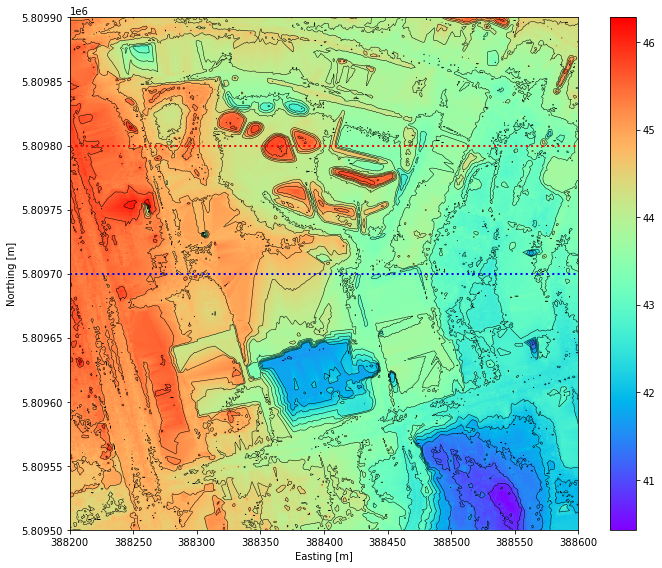

In [4]:
"""
=====================================
Example to learn reading ascii data
and plot data in multiple figures
(c) Georg Kaufmann 2017
=====================================
"""
#-----------------------------------------------------------------------
# create regular 2D grid and plot data
#-----------------------------------------------------------------------
ndata = 400 
x = np.linspace(east_min,east_max,ndata)
y = np.linspace(north_min,north_max,ndata)
xi,yi = np.meshgrid(x,y)
#zi = scipy.interpolate.griddata ((topo[:,0],topo[:,1]),topo[:,2],(xi,yi), method='linear')
zi = scipy.interpolate.griddata ((topo[:,0],topo[:,1]),topo[:,2],(xi,yi), method='nearest')
#-----------------------------------------------------------------------
# plot topography
#-----------------------------------------------------------------------
fig,ax1 = plt.subplots(1,1,figsize=(10.0, 8.0))

ax1.set_xlabel('Easting [m]')
ax1.set_ylabel('Northing [m]')
ax1.ticklabel_format(useOffset=False)
ax1.contour(xi, yi, zi, 15, linewidths = 0.5, colors = 'k')
im=ax1.pcolormesh(xi, yi, zi, cmap = plt.get_cmap('rainbow'),shading='auto')
fig.colorbar(im,ax=ax1)
ax1.plot([388200,388600],[5809700,5809700],linestyle=':',linewidth=2,color='blue')
ax1.plot([388200,388600],[5809800,5809800],linestyle=':',linewidth=2,color='red')
ax1.set_xlim([388200,388600])
ax1.set_ylim([5809500,5809900])
plt.tight_layout()
plt.savefig("Campus_topo.png")
plt.show()

## Extract profiles from DEM data

In [5]:
#-----------------------------------------------------------------------
# extract two profiles
#-----------------------------------------------------------------------
nxy=topo.shape
print (nxy[0])
profile1 = np.empty(shape=[0,2])
profile2 = np.empty(shape=[0,2])
print (profile1.shape,profile2.shape)
for i in range(nxy[0]):
    if topo[i,1] > 5809799 and topo[i,1] < 5809801:
        profile2 = np.append(profile2,[[topo[i,0],topo[i,2]]], axis=0)
    if topo[i,1] > 5809699 and topo[i,1] < 5809701:
        profile1 = np.append(profile1,[[topo[i,0],topo[i,2]]], axis=0)
print ('%s data type: %s\n%s data dimensions: %s' % \
      ('profile1: ',type(profile1),'profile1: ',profile1.shape))
print ('%s data type: %s\n%s data dimensions: %s' % \
      ('profile2: ',type(profile2),'profile1: ',profile1.shape))
#-----------------------------------------------------------------------
# write profile data  into file
#-----------------------------------------------------------------------
outfile1='Campus1.xy'
print ('=============================')
print ('%s %s' % ('Writing file: ',outfile1))
np.savetxt(outfile1, profile1, fmt='%8.0f %8.2f', delimiter=' ')
outfile2='Campus2.xy'
print ('=============================')
print ('%s %s' % ('Writing file: ',outfile2))
np.savetxt(outfile2, profile2, fmt='%8.0f %8.2f', delimiter=' ')

160801
(0, 2) (0, 2)
profile1:  data type: <class 'numpy.ndarray'>
profile1:  data dimensions: (401, 2)
profile2:  data type: <class 'numpy.ndarray'>
profile1:  data dimensions: (401, 2)
Writing file:  Campus1.xy
Writing file:  Campus2.xy


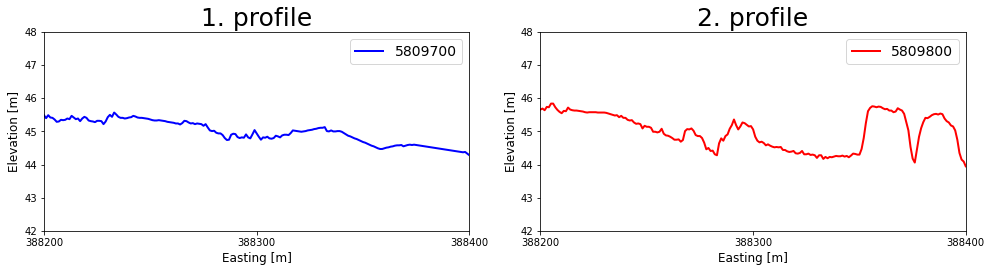

In [6]:
#-----------------------------------------------------------------------
# plot two profiles
#-----------------------------------------------------------------------
fig,axs = plt.subplots(1,2,figsize=(14.0, 4.0))
plt.rc("font",size=14)
axs[0].set_xlabel('Easting [m]',size=12)
axs[0].set_ylabel('Elevation [m]',size=12)
axs[0].set_title('1. profile',size=25)
axs[0].plot(profile1[:,0],profile1[:,1],color='blue',linestyle='-',linewidth=2,label='5809700')
#axs[0].plot(profile1[:,0],profile1[:,1],marker='x',markersize=4.5,color='blue')
axs[0].set_xlim([388200,388400])
axs[0].set_ylim([42,48])
axs[0].ticklabel_format(useOffset=False)
axs[0].set_xticks([388200,388300,388400])
axs[0].legend()

axs[1].set_xlabel('Easting [m]',size=12)
axs[1].set_ylabel('Elevation [m]',size=12)
axs[1].set_title('2. profile',size=25)
axs[1].plot(profile2[:,0],profile2[:,1],color='red',linestyle='-',linewidth=2,label='5809800')
#axs[1].plot(profile2[:,0],profile2[:,1],marker='x',markersize=4.5,color='red')
axs[1].set_xlim([388200,388400])
axs[1].set_ylim([42,48])
axs[1].ticklabel_format(useOffset=False)
axs[1].set_xticks([388200,388300,388400])
axs[1].legend()
plt.tight_layout()
plt.savefig("Campus_profiles.png")
plt.show()

## Plot structures on DEM 

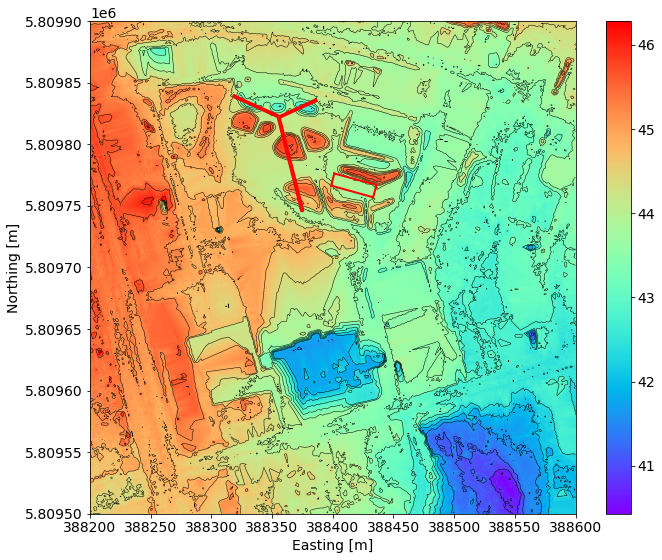

In [8]:
#-----------------------------------------------------------------------
# read data into field
#-----------------------------------------------------------------------
inpath='data/'
infile='Rigole.xy'
rigole=np.loadtxt(fname=inpath+infile,skiprows=1)
infile='Tunnel.xy'
tunnel=np.loadtxt(fname=inpath+infile,skiprows=1)
#-----------------------------------------------------------------------
# plot topography
#-----------------------------------------------------------------------
fig,ax1 = plt.subplots(1,1,figsize=(10.0, 8.0))

ax1.set_xlabel('Easting [m]')
ax1.set_ylabel('Northing [m]')
ax1.ticklabel_format(useOffset=False)
ax1.contour(xi, yi, zi, 15, linewidths = 0.5, colors = 'k')
im=ax1.pcolormesh(xi, yi, zi, cmap = plt.get_cmap('rainbow'),shading='auto')
fig.colorbar(im,ax=ax1)
ax1.plot(rigole[:,0],rigole[:,1],linestyle='-',linewidth=2,color='red')
ax1.plot(tunnel[:,0],tunnel[:,1],linestyle='-',linewidth=2,color='red')
ax1.set_xlim([388200,388600])
ax1.set_ylim([5809500,5809900])
plt.tight_layout()
plt.savefig("Campus_topo.png")
plt.show()

## 3D plot of DEM 

<class 'numpy.ndarray'> (160801, 3)
(101, 101) (101, 101) (101, 101)


<IPython.core.display.Javascript object>


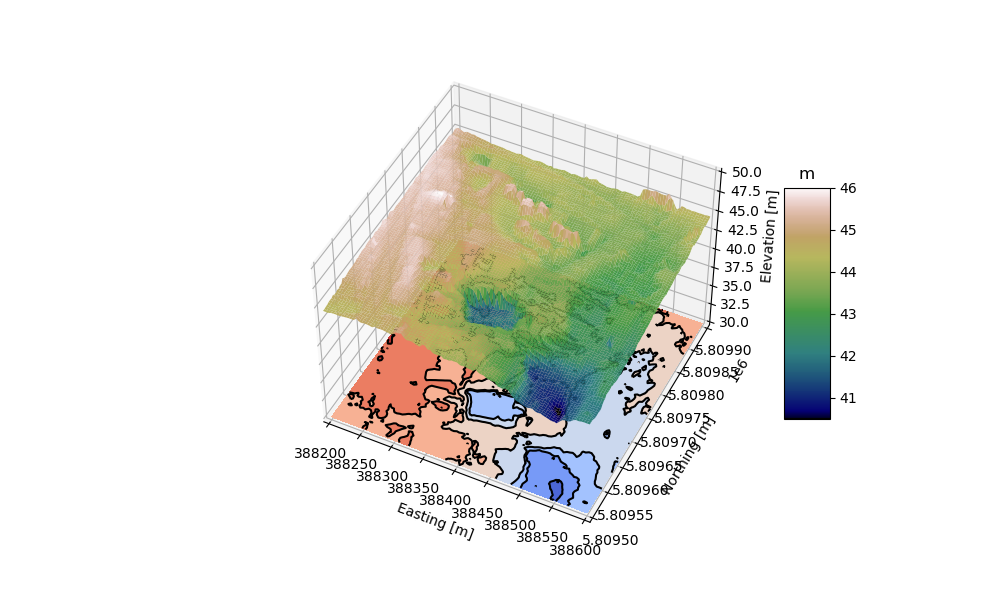

In [10]:
"""
=====================================
Example to learn reading ascii data
and plot 3D data 
(c) Georg Kaufmann 2017
=====================================
"""
%matplotlib notebook
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
#-----------------------------------------------------------------------
# read data into field
#-----------------------------------------------------------------------
inpath='data/'
infile='Campus.xyz'
topo=np.loadtxt(fname=inpath+infile,skiprows=6)
print (type(topo),topo.shape)
#-----------------------------------------------------------------------
# create mesh data
#-----------------------------------------------------------------------
east_min = np.min(topo[:,0])
east_max = np.max(topo[:,0])
north_min = np.min(topo[:,1])
north_max = np.max(topo[:,1])
ndata = 101 
xi = np.linspace(east_min,east_max,ndata)
yi = np.linspace(north_min,north_max,ndata)
X,Y = np.meshgrid(xi,yi)
Z = scipy.interpolate.griddata ((topo[:,0],topo[:,1]),topo[:,2],(X,Y), method='nearest')
print (X.shape,Y.shape,Z.shape)
#-----------------------------------------------------------------------
# plot multiple figure
#-----------------------------------------------------------------------
fig = plt.figure(figsize=(10.0, 6.0))
ax = fig.add_subplot(projection='3d')
surf=ax.plot_surface(X,Y,Z, rstride=1, cstride=1, alpha=1.0, linewidth=0,cmap=cm.gist_earth)
#ax.contour(X,Y,Z, cmap=cm.gist_earth)
ax.contourf(X,Y,Z, zdir='z', offset=30, cmap=cm.coolwarm)
ax.contour(X,Y,Z, colors='black', offset=30)
ax.set_xlabel('Easting [m]')
ax.set_xlim(388200,388600)
ax.set_ylabel('Northing [m]')
ax.set_ylim(5809500,5809900)
ax.set_zlabel('Elevation [m]')
ax.set_zlim(30, 50) 
ax.ticklabel_format(useOffset=False)
clb=fig.colorbar(surf, shrink=0.5, aspect=5)
clb.ax.set_title('m')

plt.savefig("Campus_3Dtopo.png")
plt.show()

... done